<a href="https://colab.research.google.com/github/maahnaaz/Divaar-server-client-code-/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
from sklearn import tree
from sklearn.metrics import accuracy_score

In [25]:
def Decision_Tree(x_train, y_train, x_test, y_test):
  # Building and Training the model using data from the Train set
  # We use entropy-based information gain as a heuristic and max_depth of 
  # the tree is 3
  Des_Tree = tree.DecisionTreeClassifier( criterion = 'entropy',max_depth = 3) 
  Des_Tree.fit(x_train, y_train)

  # Runing the Tree on X of Test set to compute the output
  output = Des_Tree.predict(x_test)
  # Computing the Accuracy of this tree by comparing the output and target y_test
  print('Acc = ', accuracy_score(output, y_test))
  return Des_Tree

In [26]:
def Visualize(x_train, Des_Tree):
  # Visualizing the decision tree obtained from the Train set with the help of 
  # sklearn.tree.plot_tree
  feature2 = list(x_train.columns)
  y_name = ['0','1']
  plt.figure(figsize=(20, 15))
  tree.plot_tree(Des_Tree, feature_names=feature2, class_names=y_name, fontsize=10, filled=True)
  plt.show()

In [27]:
# Reading the Train and Test files
train = pd.read_csv("/content/gene_expression_training.csv" , header='infer')

test=pd.read_csv("/content/gene_expression_test.csv" , header='infer')


In [28]:
# Spliting into X and Y of the Train file
y_train = train[['class_label']]
feature = train.columns[:-1]
x_train = train[feature]
# Spliting into X and Y of the Test file
y_test = test[['class_label']]
feature1 = test.columns[:-1]
x_test = test[feature1]

Acc =  0.869942196531792


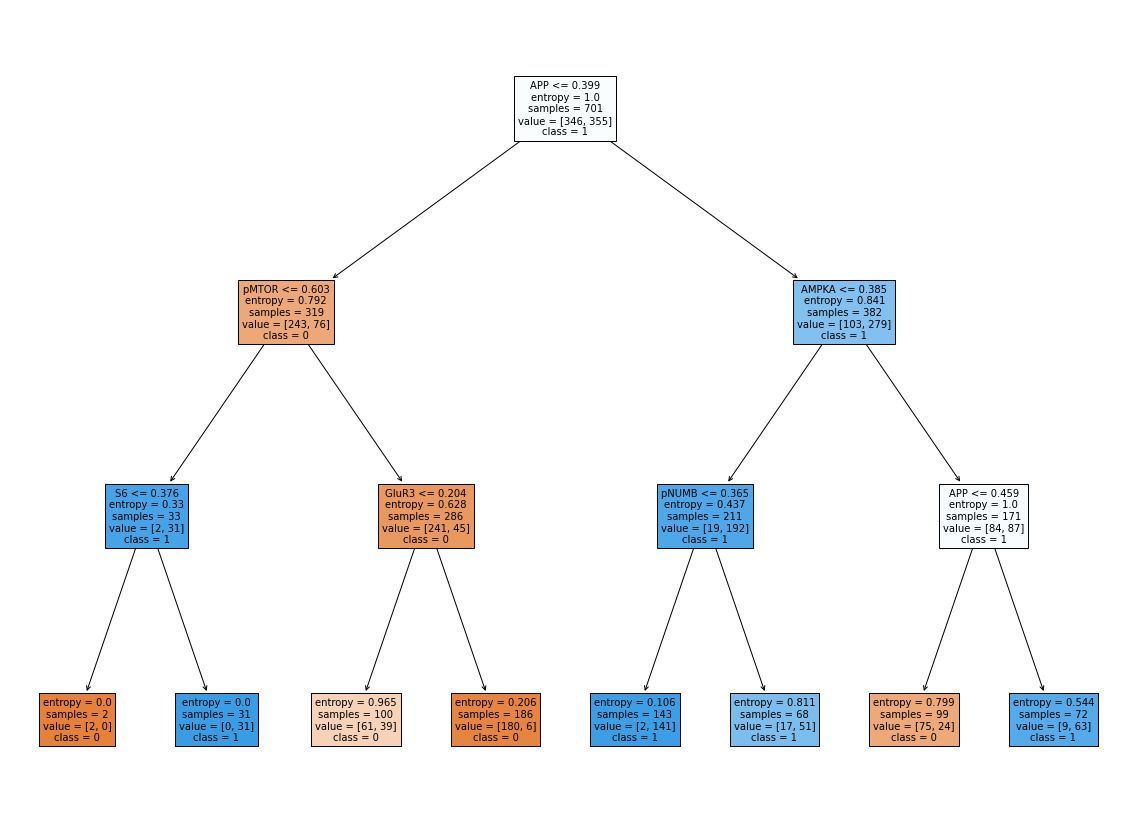

In [29]:
# Learning the Decision Tree model
Des_Tree =  Decision_Tree(x_train, y_train, x_test, y_test)
# Visualization
Visualize(x_train, Des_Tree)

[Decision Tree with max_depth = 2](https://drive.google.com/file/d/1_Vmc0wresOfsWhjCvlNYti7LGDayjOm6/view?usp=sharing)

Acc = 0.757

[Decision Tree with max_depth = 3](https://drive.google.com/file/d/1o9_-5scmeTU_vzaun_h_0Ho29emr2vQt/view?usp=sharing)

Acc = 0.869

[Decision Tree with max_depth = 4](https://drive.google.com/file/d/1eBCfann_15z-kMhYGoZiC5_2_Sht1Rtl/view?usp=sharing)

Acc = 0.872

As we can see, by changing the depth of our decision tree, we get different accuracies.

#### The number of papers in Google scholar for each of 6 genes that are used in the decision tree
*pMTOR trisomy* : About 163 results <br>
*AMPKA trisomy* : About 1.010 results <br>
*gluR3 trisomy* : About 24 results <br>
*pNUMB trisomy* : About 828 results <br>
*Amyloid Precursor Protein (APP) trisomy* : About 9.230 results <br>
*S6 trisomy* : About 4.890 results <br>

#### Task 2.3

In [30]:
def noisy_train_data(prob):
    train.iloc[:, -1:]
    num_of_instances = len(train.index)
    # Make copy of dataset to put noises in it
    noisy_train = train.copy()
    for i in range(num_of_instances):
        rand_prob = random()
        if rand_prob < prob:
            noisy_train.at[i, 'class_label'] = abs(noisy_train.at[i, 'class_label'] - 1)
    # Create CSV file based on the noisy dataset    
    noisy_train.to_csv(f'/content/{prob}noise_training.csv', index=False)

 0.1 Probability of noise

Acc =  0.8497109826589595


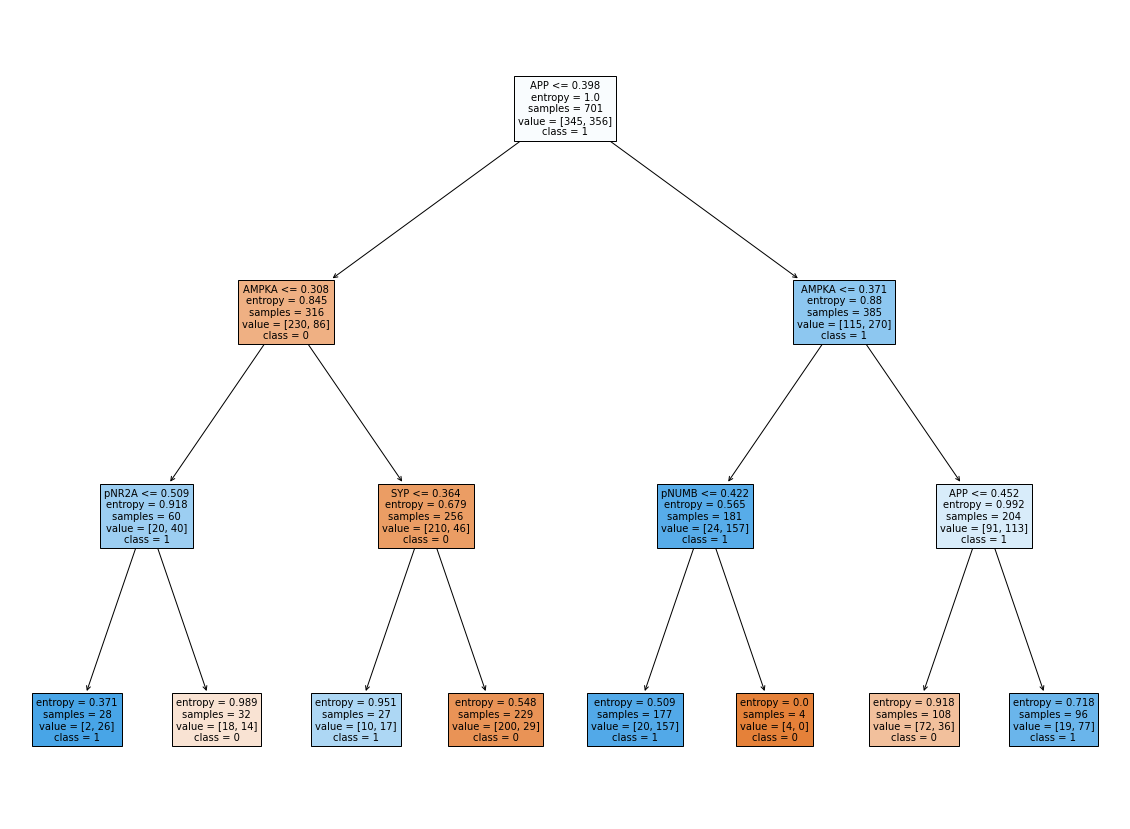

In [31]:
noisy_train_data(0.1)
noisy_train = pd.read_csv('/content/0.1noise_training.csv' , header='infer')
# Spliting into X and Y of the noisy Train file
noisy_y_train = noisy_train[['class_label']]
noisy_feature = noisy_train.columns[:-1]
noisy_x_train = noisy_train[feature]
# Spliting into X and Y of the Test file
y_test = test[['class_label']]
feature1 = test.columns[:-1]
x_test = test[feature1]
# Learning the Decision Tree model with noisy training data
n_Des_Tree =  Decision_Tree(noisy_x_train, noisy_y_train, x_test, y_test)
# Visualization
Visualize(noisy_x_train, n_Des_Tree)

0.25 Probability of noise

Acc =  0.7774566473988439


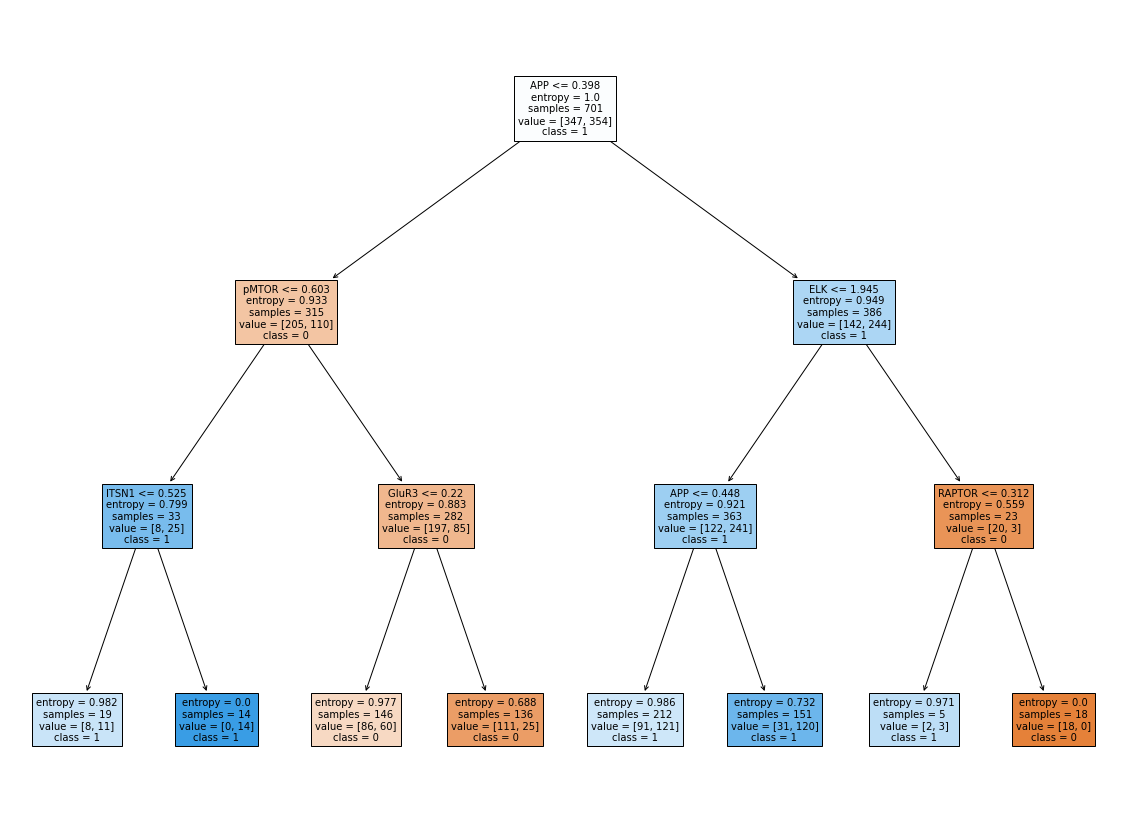

In [32]:
noisy_train_data(0.25)
noisy_train = pd.read_csv('/content/0.25noise_training.csv' , header='infer')
# Spliting into X and Y of the noisy Train file
noisy_y_train = noisy_train[['class_label']]
noisy_feature = noisy_train.columns[:-1]
noisy_x_train = noisy_train[feature]
# Spliting into X and Y of the Test file
y_test = test[['class_label']]
feature1 = test.columns[:-1]
x_test = test[feature1]
# Learning the Decision Tree model with noisy training data
n_Des_Tree =  Decision_Tree(noisy_x_train, noisy_y_train, x_test, y_test)
# Visualization
Visualize(noisy_x_train, n_Des_Tree)